# Упражнение с CNN 
Мы будем работать с набором данных <a href='https://www.kaggle.com/zalando-research/fashionmnist'> Fashion-MNIST </a>, который  доступен через <a href = 'https://pytorch.org/docs/stable/torchvision/index.html'> <tt> <STRONG> torchvision </STRONG> </tt> </a>. Как и MNIST, этот набор данных состоит из обучающего набора из 60000 изображений и тестового множества из 10000 примеров. Каждый пример представляет собой изображение в градациях серого цвета 28x28, с меткой одного из 10 классов:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot



## Импорт, загрузка  Fashion-MNIST 
Запустите ячейку ниже, чтобы загрузить библиотеки, необходимые для этого упражнения, и набор данных Fashion-MNIST. <br>
PyTorch делает доступным набор данных Fashion-MNIST через <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist'> <tt> <strong> torchvision </strong> </tt> </a>. При первом вызове набор данных будет загружен на ваш компьютер по указанному пути. С этого момента torchvision всегда будет искать локальную копию перед тем как загрузить данные в следующий раз.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

## 1. Создать data loaders
Используйте DataLoader чтобы создать <tt>train_loader</tt> и <tt>test_loader</tt>. Размеры батчей установить в 10.

In [3]:
# ВАШ КОД
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)


In [2]:
# DON'T WRITE HERE

## 2. Изучите батч изображений
Используйте DataLoader, <tt> make_grid </tt> и matplotlib для отображения первого батча из 10 изображений. <br>
ДОПОЛНИТЕЛЬНО: отобразите метки классов

In [4]:
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

Label: [7 1 7 4 5 1 8 8 6 4]
Class: Sneaker Trouser Sneaker Coat Sandal Trouser Bag Bag Shirt Coat


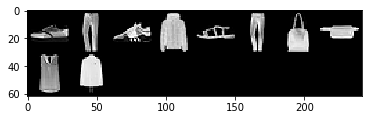

In [17]:
from itertools import islice
# ВАШ КОД
report = 'Class: '
label = 'Label: ['
for i_batch, sample_batched in islice(train_loader,1):
    show(make_grid(i_batch, padding=2))
    for k in sample_batched:
        report += class_names[k] + ' '
        label += str(int(k)) + ' '
res = label[:-1] + ']\n' + report[:-1]
print(res)

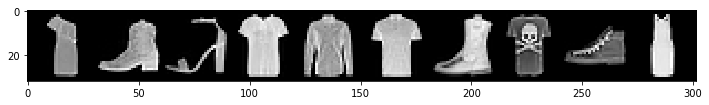

In [3]:
# DON'T WRITE HERE
# IMAGES ONLY

Label:  [9 2 5 9 4 2 1 2 7 3]
Class:  Boot Sweater Sandal Boot Coat Sweater Trouser Sweater Sneaker Dress


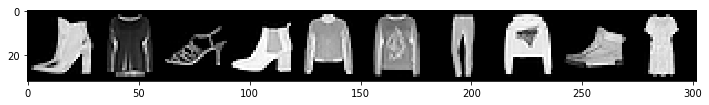

In [4]:
# DON'T WRITE HERE
# IMAGES AND LABELS

## Вопросы для самоконтроля
<H3> 3. Если изображение 28x28 пропускается через сверточный слой с использованием фильтра 5x5, с шагом 1 и без padding, каков будет размер матрицы (на выходе)? </H3>

24x24

In [18]:
######################################################
## ЗАПУСТИТЕ ЭТОТ КОД ТОЛЬКО ЧТОБЫ ПРОВЕРИТЬ ОТВЕТ! ##
######################################################


# Run the code below to check your answer:
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

Orig size: torch.Size([10, 1, 28, 28])
Down size: torch.Size([10, 1, 24, 24])


### 4. Если пример из вопроса 3 затем пропускается через слой MaxPooling 2x2, каков будет размер результирующей матрицы?

12x12

In [19]:
######################################################
## ЗАПУСТИТЕ ЭТОТ КОД ТОЛЬКО ЧТОБЫ ПРОВЕРИТЬ ОТВЕТ! ##
######################################################

# Run the code below to check your answer:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

Down size: torch.Size([10, 1, 12, 12])


## Определяем CNN 
### 5. Определить сверточную нейронную сеть
Определите модель CNN, которую можно обучить в наборе данных Fashion-MNIST. Модель должна содержать два сверточных слоя, два пулинга и два полносвязанных слоя. Вы можете использовать любое количество нейронов на слой, если модель принимает изображение размером 28x28 и возвращает результат 10. 

In [32]:

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, 1)
        self.conv2 = nn.Conv2d(8, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 80)
        self.fc2 = nn.Linear(80,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)
    
torch.manual_seed(101)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=10, bias=True)
)

## Обучаемые параметры

### 6. Каково общее количество обучаемых параметров в модели выше?
Ответ будут варьироваться в зависимости от того, как вы определили модель.

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [33]:
# ВАШ КОД
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

    72
     8
  1152
    16
 32000
    80
   800
    10
______
 34138


### 7. Определить функцию потерь и оптимизатор
Определите функцию потерь под названием «criterion» и оптимизатор под названием «optimizer». <br>
Вы можете использовать любые функции, какие захотите, хотя мы использовали CrossEntropyLoss и Adam (с шагом lr= 0,001) соответственно.

In [34]:
# ВАШ КОД
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



In [6]:
# DON'T WRITE HERE

### 8. Тренируем модель
Обучайте модель 5 эпох. <br>
ДОПОЛНИТЕЛЬНО: Сделайте вывод после каждой эпохи, чтобы показать прогресс в обучении. Измерьте время обучения на одну эпоху.

In [35]:
# ВАШ КОД
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# цикл по эпохам
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    epoch_start = time.time()
    # цикл по батчам
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # применяем модель
        y_pred = model(X_train)  
        loss = criterion(y_pred, y_train)
 
        # Считаем количество правильных прогнозов
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Обновляем параметры
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
    print(f'epoch: {i:2}  duration: {time.time() - epoch_start} seconds  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Запусткаем на тестовых батчах
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Применяем модель
            y_val = model(X_test)

            # Считаем количество правильных прогнозов (на тесте)
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') 





epoch:  0  duration: 33.01661443710327 seconds  loss: 0.72478396  accuracy:  80.177%
epoch:  1  duration: 32.88776230812073 seconds  loss: 0.25284618  accuracy:  86.603%
epoch:  2  duration: 32.95026230812073 seconds  loss: 0.34589130  accuracy:  88.115%
epoch:  3  duration: 32.8408420085907 seconds  loss: 0.04239383  accuracy:  89.113%
epoch:  4  duration: 32.95037388801575 seconds  loss: 0.12682751  accuracy:  89.835%

Duration: 173 seconds


1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


### 9. Оцените модель
Вызовите <tt> model.eval () </tt> и определите процент правильных значений из 10000 тестовых изображений.

In [39]:
# ВАШ КОД
model.eval()

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

correct = 0
for X_test, y_test in test_load_all:
    y_val = model(X_test)  
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')




Test accuracy: 8879/10000 =  88.790%


Test accuracy: 8733/10000 =  87.330%
